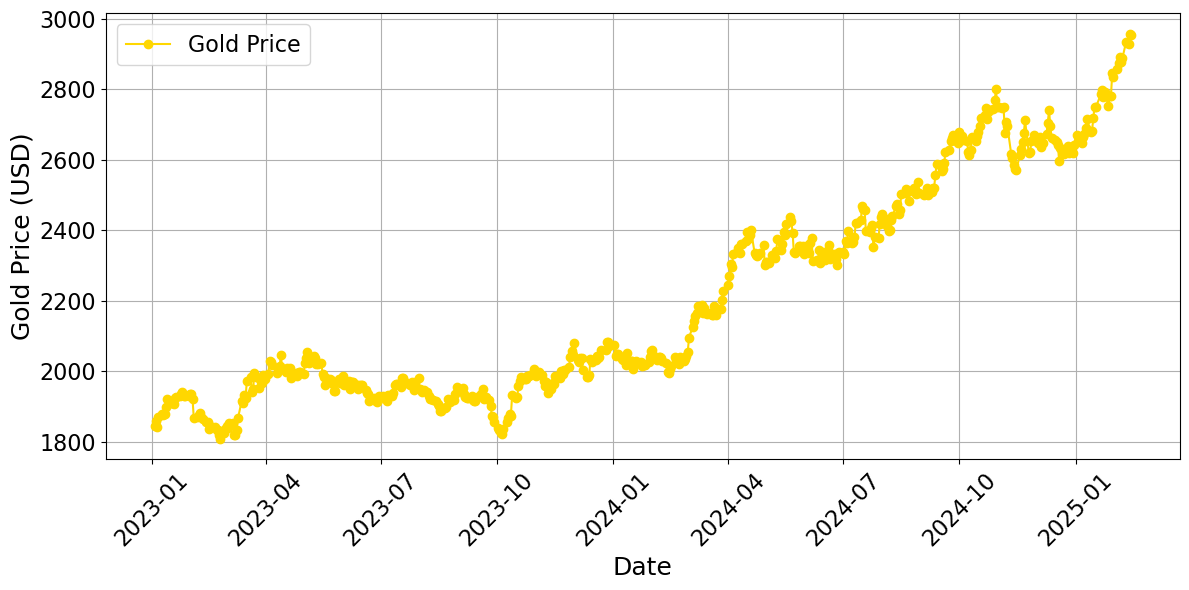

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file Excel
file_path = "gold_macro_data.xlsx"  # Đảm bảo file nằm trong thư mục đang chạy script
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Chuyển đổi cột 'Date' thành kiểu datetime
df['Date'] = pd.to_datetime(df['Date'])

# Vẽ biểu đồ giá vàng theo thời gian
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Gold_Price'], marker='o', linestyle='-', color='gold', label='Gold Price')

# Cài đặt nhãn trục và chú thích với cỡ chữ lớn hơn
plt.xlabel('Date', fontsize=18)
plt.ylabel('Gold Price (USD)', fontsize=18)
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)

plt.tight_layout()
plt.show()


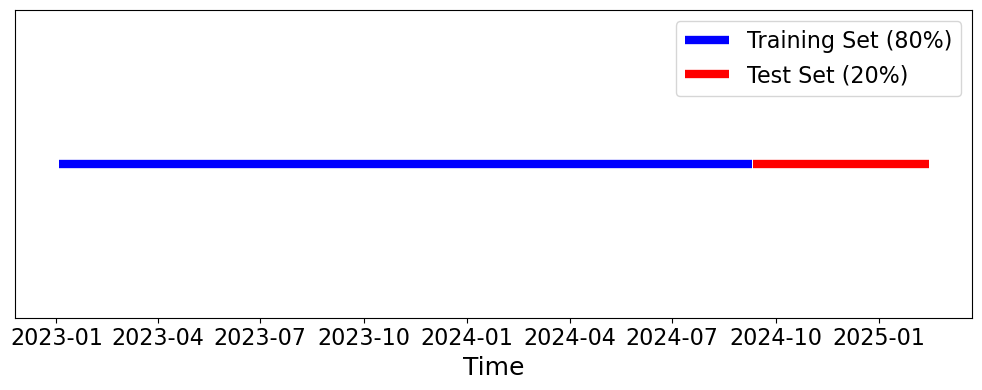

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file Excel
file_path = "gold_macro_data.xlsx"
df = pd.read_excel(file_path)

# Đổi tên cột nếu cần
date_column = 'Date'         # Cột thời gian
price_column = 'Gold_Price'  # Cột giá vàng

# Chuyển cột thời gian sang datetime
df[date_column] = pd.to_datetime(df[date_column])

# Chia 80% train, 20% test
train_size = int(len(df) * 0.8)
train_dates = df[date_column][:train_size]
test_dates = df[date_column][train_size:]

# Vẽ biểu đồ chia tập dữ liệu
plt.figure(figsize=(10, 4))
plt.hlines(y=1, xmin=train_dates.iloc[0], xmax=train_dates.iloc[-1], color='blue', linewidth=6, label='Training Set (80%)')
plt.hlines(y=1, xmin=test_dates.iloc[0], xmax=test_dates.iloc[-1], color='red', linewidth=6, label='Test Set (20%)')

# Tùy chỉnh cỡ chữ
plt.xlabel("Time", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks([], [])  # Ẩn trục y
plt.legend(fontsize=16)


plt.tight_layout()
plt.show()


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Danh sách tham số cần thử nghiệm (AR, d, MA)
sarimax_params = [
    (1, 1, 1), (12, 1, 1), (13, 1, 1), (16, 1, 1),
    (1, 1, 13), (12, 1, 13), (13, 1, 13), (16, 1, 13),
    (1, 1, 16), (12, 1, 16), (13, 1, 16), (16, 1, 16)
]
results = []

for order in sarimax_params:
    print(f"Training SARIMAX with order={order}...")

    # Huấn luyện mô hình SARIMAX
    model_sarimax = SARIMAX(df['Gold_Price'], order=order, enforce_stationarity=False, enforce_invertibility=False)
    model_sarimax_fit = model_sarimax.fit(disp=False)

    # Dự báo
    predictions = model_sarimax_fit.fittedvalues

    # Đánh giá mô hình
    rmse = np.sqrt(mean_squared_error(df['Gold_Price'], predictions))
    mae = mean_absolute_error(df['Gold_Price'], predictions)
    mape = np.mean(np.abs((df['Gold_Price'] - predictions) / df['Gold_Price']) * 100)

    # Lưu kết quả
    results.append([order, rmse, mae, mape])

# --- 5. Tạo bảng kết quả ---
results_df = pd.DataFrame(results, columns=['Order (p,d,q)', 'RMSE', 'MAE', 'MAPE'])
print("\nComparison of SARIMAX Performance with Different Parameters:")
print(results_df)


Training SARIMAX with order=(1, 1, 1)...
Training SARIMAX with order=(12, 1, 1)...
Training SARIMAX with order=(13, 1, 1)...
Training SARIMAX with order=(16, 1, 1)...
Training SARIMAX with order=(1, 1, 13)...
Training SARIMAX with order=(12, 1, 13)...


D:\chính sách\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Training SARIMAX with order=(13, 1, 13)...


D:\chính sách\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Training SARIMAX with order=(16, 1, 13)...


D:\chính sách\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Training SARIMAX with order=(1, 1, 16)...
Training SARIMAX with order=(12, 1, 16)...


D:\chính sách\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Training SARIMAX with order=(13, 1, 16)...


D:\chính sách\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Training SARIMAX with order=(16, 1, 16)...


D:\chính sách\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Comparison of SARIMAX Performance with Different Parameters:
   Order (p,d,q)       RMSE        MAE      MAPE
0      (1, 1, 1)  81.654415  18.462671  0.856197
1     (12, 1, 1)  88.259102  20.270007  0.955286
2     (13, 1, 1)  87.250743  20.113186  0.947345
3     (16, 1, 1)  84.915234  19.971194  0.940152
4     (1, 1, 13)  83.738266  19.078242  0.892180
5    (12, 1, 13)  88.437748  21.706271  1.039669
6    (13, 1, 13)  88.205987  21.841426  1.045773
7    (16, 1, 13)  88.170287  21.693431  1.038967
8     (1, 1, 16)  83.930717  18.941517  0.886299
9    (12, 1, 16)  87.361290  21.557421  1.031969
10   (13, 1, 16)  88.045031  21.784727  1.043831
11   (16, 1, 16)  86.499784  21.363550  1.020449


D:\chính sách\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\chính sách\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


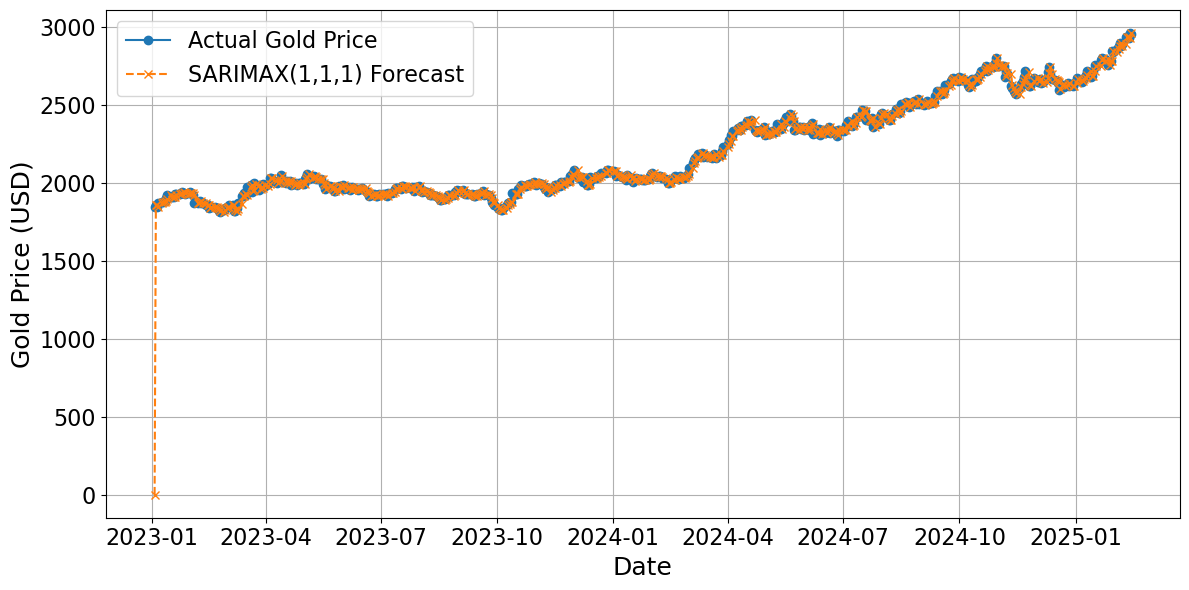

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Đọc dữ liệu từ file Excel
file_path = "gold_macro_data.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Đặt tên cột cho đúng nếu chưa có
df.rename(columns={df.columns[0]: "Date", df.columns[1]: "Gold_Price"}, inplace=True)

# Chuyển đổi thời gian
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.dropna()

# Mô hình SARIMAX(1,1,1)
model_sarimax = SARIMAX(df['Gold_Price'], order=(1, 1, 1), enforce_stationarity=False, enforce_invertibility=False)
model_fit = model_sarimax.fit()

# Dự báo
df['Forecast'] = model_fit.fittedvalues

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Gold_Price'], label='Actual Gold Price', marker='o', linestyle='-')
plt.plot(df.index, df['Forecast'], label='SARIMAX(1,1,1) Forecast', marker='x', linestyle='dashed')
plt.xlabel("Date", fontsize=18)
plt.ylabel("Gold Price (USD)", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)

# Bỏ tiêu đề biểu đồ
# plt.title("SARIMAX(1,1,1) - Actual vs Forecasted Gold Prices")

plt.tight_layout()
plt.show()


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# --- 1. Chuẩn bị dữ liệu ---
file_path = "gold_macro_data.xlsx"  
df = pd.read_excel(file_path)  
scaler = MinMaxScaler(feature_range=(-1, 1))
df['Gold_Price_scaled'] = scaler.fit_transform(df[['Gold_Price']])

# Chia tập dữ liệu (80% train, 20% test)
train_size = int(len(df) * 0.8)
train_data, test_data = df['Gold_Price_scaled'][:train_size], df['Gold_Price_scaled'][train_size:]

# Hàm tạo chuỗi dữ liệu cho LSTM
def create_sequences(data, seq_length=10):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

seq_length = 10
X_train, y_train = create_sequences(train_data.values, seq_length)
X_test, y_test = create_sequences(test_data.values, seq_length)

# Định dạng dữ liệu cho LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# --- 2. Thử nghiệm với các mức epoch khác nhau ---
epochs_list = [100, 150, 200, 250, 275]
results = []

for epochs in epochs_list:
    print(f"Training LSTM with {epochs} epochs...")

    # Xây dựng mô hình LSTM
    model_lstm = Sequential([
        LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
        LSTM(50, activation='relu'),
        Dense(1)
    ])

    model_lstm.compile(optimizer='adam', loss='mse')

    # Huấn luyện mô hình
    model_lstm.fit(X_train, y_train, epochs=epochs, batch_size=16, validation_data=(X_test, y_test), verbose=0)

    # Dự báo trên tập test
    y_pred_lstm = model_lstm.predict(X_test)

    # Chuyển kết quả về thang đo gốc
    y_pred_lstm_rescaled = scaler.inverse_transform(y_pred_lstm)

    # Đánh giá mô hình
    rmse = np.sqrt(mean_squared_error(df['Gold_Price'].iloc[-len(y_pred_lstm):], y_pred_lstm_rescaled))
    mae = mean_absolute_error(df['Gold_Price'].iloc[-len(y_pred_lstm):], y_pred_lstm_rescaled)
    mape = np.mean(np.abs((df['Gold_Price'].iloc[-len(y_pred_lstm):] - y_pred_lstm_rescaled.flatten()) / df['Gold_Price'].iloc[-len(y_pred_lstm):]) * 100)

    # Lưu kết quả vào danh sách
    results.append([epochs, rmse, mae, mape])

# --- 3. Tạo bảng kết quả ---
results_df = pd.DataFrame(results, columns=['Epochs', 'RMSE', 'MAE', 'MAPE'])
print("\nComparison of LSTM Performance with Different Epochs:")
print(results_df)


Training LSTM with 100 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/4 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000021A91C967A0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 508ms/step
Training LSTM with 150 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 404ms/step
Training LSTM with 200 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 681ms/step
Training LSTM with 250 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step
Training LSTM with 275 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 467ms/step

Comparison of LSTM Performance with Different Epochs:
   Epochs       RMSE        MAE      MAPE
0     100  83.201941  73.648164  2.682764
1     150  61.696871  54.709562  1.999257
2     200  90.021449  80.856876  2.949881
3     250  73.647925  62.730582  2.278200
4     275  77.308110  67.353454  2.450937


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 27s 128ms/step - loss: 0.0665 - val_loss: 0.0635
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0091 - val_loss: 0.0313
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0018 - val_loss: 0.0206
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0013 - val_loss: 0.0064
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0012 - val_loss: 0.0046
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0010 - val_loss: 0.0050
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0011 - val_loss: 0.0045
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0011 - val_loss: 0.0027
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0011 - val_loss: 0.0027
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0011 - val_loss: 0.0025
Epoch 11/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 8.9496e-04 - val_loss: 0.0039
Epoch 12/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 30m

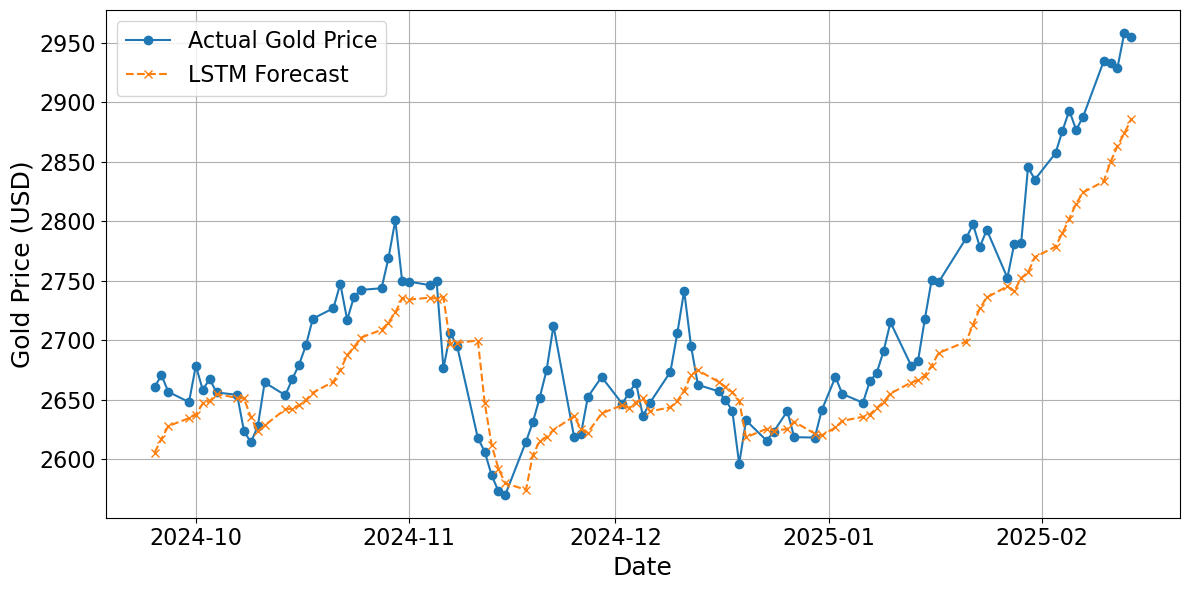

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Đọc dữ liệu
file_path = "gold_macro_data.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")
df.rename(columns={df.columns[0]: "Date", df.columns[1]: "Gold_Price"}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
df['Gold_Price_Scaled'] = scaler.fit_transform(df[['Gold_Price']])

# Hàm tạo chuỗi dữ liệu
def create_sequences(data, seq_length=10):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

# Tạo tập train/test
seq_length = 10
train_size = int(len(df) * 0.8)
train_data, test_data = df['Gold_Price_Scaled'][:train_size], df['Gold_Price_Scaled'][train_size:]
X_train, y_train = create_sequences(train_data.values, seq_length)
X_test, y_test = create_sequences(test_data.values, seq_length)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Xây dựng mô hình LSTM
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Dự báo
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test_rescaled, label="Actual Gold Price", marker="o", linestyle="-")
plt.plot(df.index[-len(y_test):], y_pred_rescaled, label="LSTM Forecast", marker="x", linestyle="dashed")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Gold Price (USD)", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()



RMSE: 303.24
MAE: 279.57
MAPE: 10.25%


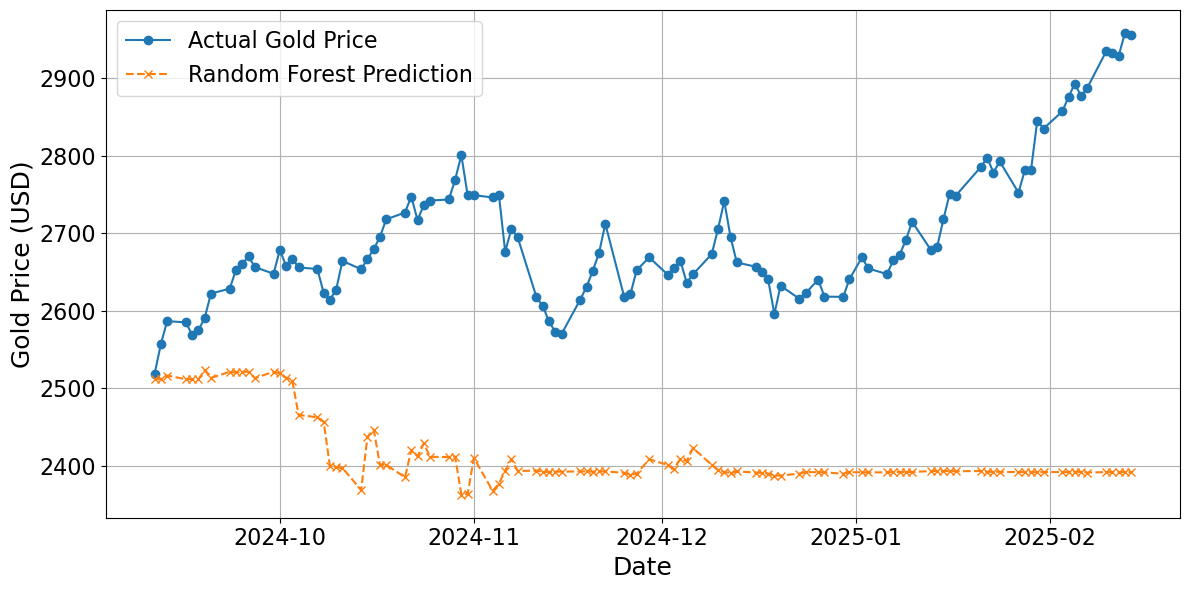

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Đọc dữ liệu
file_path = "gold_macro_data.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Đổi tên cột
df.rename(columns={df.columns[0]: "Date", df.columns[1]: "Gold_Price"}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

# Chọn biến đầu vào và xử lý thiếu
features = ['USD_Index', 'Fed_Rate', 'US_CPI', 'Oil_Price', 'SP500', 'Bond_Yield']
df_rf = df.dropna()

X = df_rf[features]
y = df_rf['Gold_Price']
dates = df_rf[['Date']]

# Tách tập train/test
X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(
    X, y, dates, test_size=0.2, shuffle=False, random_state=42
)

# Huấn luyện mô hình
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Đánh giá
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae = mean_absolute_error(y_test, y_pred_rf)
mape = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

# Kết quả dự báo
pred_df = pd.DataFrame({'Date': dates_test['Date'], 'Actual': y_test, 'Predicted': y_pred_rf})
pred_df.sort_values('Date', inplace=True)

# --- Vẽ biểu đồ ---
plt.figure(figsize=(12, 6))
plt.plot(pred_df['Date'], pred_df['Actual'], label='Actual Gold Price', marker='o', linestyle='-')
plt.plot(pred_df['Date'], pred_df['Predicted'], label='Random Forest Prediction', marker='x', linestyle='dashed')

# Nhãn trục và cỡ chữ
plt.xlabel("Date", fontsize=18)
plt.ylabel("Gold Price (USD)", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)

# Bỏ tiêu đề
# plt.title(...)

# Định dạng trục thời gian kiểu YYYY-MM
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Không xoay chữ
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Đọc dữ liệu
file_path = "gold_macro_data.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Danh sách các cấu hình SARIMAX
sarimax_configs = [ (1, 1, 1), (12, 1, 1), (13, 1, 1), (16, 1, 1)]
# Danh sách số epoch cho LSTM
epochs_list = [100, 150, 200, 250, 275]

# Lưu kết quả
results = []

for order in sarimax_configs:
    print(f"Training SARIMAX with order {order}...")
    model_sarimax = SARIMAX(df['Gold_Price'], order=order, enforce_stationarity=False, enforce_invertibility=False)
    model_sarimax_fit = model_sarimax.fit()
    df['Residuals'] = model_sarimax_fit.resid
    
    scaler = MinMaxScaler(feature_range=(-1, 1))
    df['Residuals_scaled'] = scaler.fit_transform(df[['Residuals']])
    
    train_size = int(len(df) * 0.8)
    train_data, test_data = df['Residuals_scaled'][:train_size], df['Residuals_scaled'][train_size:]
    
    def create_sequences(data, seq_length=10):
        sequences, labels = [], []
        for i in range(len(data) - seq_length):
            sequences.append(data[i:i+seq_length])
            labels.append(data[i+seq_length])
        return np.array(sequences), np.array(labels)
    
    seq_length = 10
    X_train, y_train = create_sequences(train_data.values, seq_length)
    X_test, y_test = create_sequences(test_data.values, seq_length)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    
    features = ['USD_Index', 'Fed_Rate', 'US_CPI', 'Oil_Price', 'SP500', 'Bond_Yield']
    df_rf = df.dropna()
    X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(df_rf[features], df_rf['Residuals'], test_size=0.2, random_state=42)
    
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train_rf, y_train_rf)
    y_pred_rf = rf_model.predict(X_test_rf)
    
    for epochs in epochs_list:
        print(f"Training LSTM with {epochs} epochs...")
        model_lstm = Sequential([
            LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
            LSTM(50, activation='relu'),
            Dense(1)
        ])
        
        model_lstm.compile(optimizer='adam', loss='mse')
        model_lstm.fit(X_train, y_train, epochs=epochs, batch_size=16, validation_data=(X_test, y_test), verbose=0)
        
        y_pred_lstm = model_lstm.predict(X_test)
        y_pred_lstm_rescaled = scaler.inverse_transform(y_pred_lstm)
        
        final_prediction = model_sarimax_fit.fittedvalues.iloc[-len(y_pred_lstm):] + y_pred_lstm_rescaled.flatten() + y_pred_rf[-len(y_pred_lstm):]
        
        rmse = np.sqrt(mean_squared_error(df['Gold_Price'].iloc[-len(final_prediction):], final_prediction))
        mae = mean_absolute_error(df['Gold_Price'].iloc[-len(final_prediction):], final_prediction)
        mape = np.mean(np.abs((df['Gold_Price'].iloc[-len(final_prediction):] - final_prediction) / df['Gold_Price'].iloc[-len(final_prediction):]) * 100)
        
        results.append([order, epochs, rmse, mae, mape])

# Lưu kết quả vào DataFrame
results_df = pd.DataFrame(results, columns=['SARIMAX Order', 'Epochs', 'RMSE', 'MAE', 'MAPE'])
print(results_df)


Training SARIMAX with order (1, 1, 1)...


D:\chính sách\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\chính sách\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Training LSTM with 100 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 458ms/step
Training LSTM with 150 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 514ms/step
Training LSTM with 200 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 514ms/step
Training LSTM with 250 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 579ms/step
Training LSTM with 275 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 742ms/step
Training SARIMAX with order (12, 1, 1)...


D:\chính sách\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\chính sách\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Training LSTM with 100 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 416ms/step
Training LSTM with 150 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 466ms/step
Training LSTM with 200 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 455ms/step
Training LSTM with 250 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 428ms/step
Training LSTM with 275 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 457ms/step
Training SARIMAX with order (13, 1, 1)...


D:\chính sách\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\chính sách\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Training LSTM with 100 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 361ms/step
Training LSTM with 150 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 409ms/step
Training LSTM with 200 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 371ms/step
Training LSTM with 250 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 408ms/step
Training LSTM with 275 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 463ms/step
Training SARIMAX with order (16, 1, 1)...


D:\chính sách\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\chính sách\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Training LSTM with 100 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 355ms/step
Training LSTM with 150 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 362ms/step
Training LSTM with 200 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 635ms/step
Training LSTM with 250 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 395ms/step
Training LSTM with 275 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 399ms/step
   SARIMAX Order  Epochs       RMSE        MAE      MAPE
0      (1, 1, 1)     100  29.588369  22.772028  0.845412
1      (1, 1, 1)     150  32.537369  24.905989  0.925981
2      (1, 1, 1)     200  30.157954  23.745189  0.878268
3      (1, 1, 1)     250  28.343324  22.038913  0.816514
4      (1, 1, 1)     275  28.185614  21.868403  0.810570
5     (12, 1, 1)     100  50.777171  27.017659  0.996412
6     (12, 1, 1)     150  49.891546  28.212317  1.040414
7     (12, 1, 1)     200  50.459754  26.725952  0.985774
8     (12, 1, 1)     250  53.652549  28.945586  1.068575
9     (12, 1, 1)     275  49.480271  26.252094  0.967814
10    (13, 1, 1)     100  47.146494  26.566037  0.980845
11    (13, 1, 1)     150  49.534644  32.927877  1.215456
12    (13, 1, 1)     200  46.060240  26.031240  0.960938
13    (13, 1, 1)     250  46.535718  25.936096  0.957569
14    (13, 1, 1)     275  46.950901  26.092945  0.963617
15    (16, 1, 1)     100  37.050677  23.676868  0

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Đọc dữ liệu
file_path = "gold_macro_data.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Danh sách các cấu hình SARIMAX
sarimax_configs = [ (1, 1, 13), (12, 1, 13), (13, 1, 13), (16, 1, 13)]
# Danh sách số epoch cho LSTM
epochs_list = [100, 150, 200, 250, 275]

# Lưu kết quả
results = []

for order in sarimax_configs:
    print(f"Training SARIMAX with order {order}...")
    model_sarimax = SARIMAX(df['Gold_Price'], order=order, enforce_stationarity=False, enforce_invertibility=False)
    model_sarimax_fit = model_sarimax.fit()
    df['Residuals'] = model_sarimax_fit.resid
    
    scaler = MinMaxScaler(feature_range=(-1, 1))
    df['Residuals_scaled'] = scaler.fit_transform(df[['Residuals']])
    
    train_size = int(len(df) * 0.8)
    train_data, test_data = df['Residuals_scaled'][:train_size], df['Residuals_scaled'][train_size:]
    
    def create_sequences(data, seq_length=10):
        sequences, labels = [], []
        for i in range(len(data) - seq_length):
            sequences.append(data[i:i+seq_length])
            labels.append(data[i+seq_length])
        return np.array(sequences), np.array(labels)
    
    seq_length = 10
    X_train, y_train = create_sequences(train_data.values, seq_length)
    X_test, y_test = create_sequences(test_data.values, seq_length)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    
    features = ['USD_Index', 'Fed_Rate', 'US_CPI', 'Oil_Price', 'SP500', 'Bond_Yield']
    df_rf = df.dropna()
    X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(df_rf[features], df_rf['Residuals'], test_size=0.2, random_state=42)
    
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train_rf, y_train_rf)
    y_pred_rf = rf_model.predict(X_test_rf)
    
    for epochs in epochs_list:
        print(f"Training LSTM with {epochs} epochs...")
        model_lstm = Sequential([
            LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
            LSTM(50, activation='relu'),
            Dense(1)
        ])
        
        model_lstm.compile(optimizer='adam', loss='mse')
        model_lstm.fit(X_train, y_train, epochs=epochs, batch_size=16, validation_data=(X_test, y_test), verbose=0)
        
        y_pred_lstm = model_lstm.predict(X_test)
        y_pred_lstm_rescaled = scaler.inverse_transform(y_pred_lstm)
        
        final_prediction = model_sarimax_fit.fittedvalues.iloc[-len(y_pred_lstm):] + y_pred_lstm_rescaled.flatten() + y_pred_rf[-len(y_pred_lstm):]
        
        rmse = np.sqrt(mean_squared_error(df['Gold_Price'].iloc[-len(final_prediction):], final_prediction))
        mae = mean_absolute_error(df['Gold_Price'].iloc[-len(final_prediction):], final_prediction)
        mape = np.mean(np.abs((df['Gold_Price'].iloc[-len(final_prediction):] - final_prediction) / df['Gold_Price'].iloc[-len(final_prediction):]) * 100)
        
        results.append([order, epochs, rmse, mae, mape])

# Lưu kết quả vào DataFrame
results_df = pd.DataFrame(results, columns=['SARIMAX Order', 'Epochs', 'RMSE', 'MAE', 'MAPE'])
print(results_df)


Training SARIMAX with order (1, 1, 13)...


D:\chính sách\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\chính sách\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Training LSTM with 100 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 631ms/step
Training LSTM with 150 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 481ms/step
Training LSTM with 200 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 568ms/step
Training LSTM with 250 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 646ms/step
Training LSTM with 275 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 567ms/step
Training SARIMAX with order (12, 1, 13)...


D:\chính sách\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\chính sách\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\chính sách\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Training LSTM with 100 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 418ms/step
Training LSTM with 150 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 465ms/step
Training LSTM with 200 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 454ms/step
Training LSTM with 250 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step 
Training LSTM with 275 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 747ms/step
Training SARIMAX with order (13, 1, 13)...


D:\chính sách\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\chính sách\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\chính sách\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Training LSTM with 100 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 522ms/step
Training LSTM with 150 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 683ms/step
Training LSTM with 200 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 674ms/step
Training LSTM with 250 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 594ms/step
Training LSTM with 275 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step   
Training SARIMAX with order (16, 1, 13)...


D:\chính sách\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\chính sách\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\chính sách\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Training LSTM with 100 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 553ms/step
Training LSTM with 150 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 488ms/step
Training LSTM with 200 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 436ms/step
Training LSTM with 250 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 615ms/step
Training LSTM with 275 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 48s 763ms/step
   SARIMAX Order  Epochs       RMSE        MAE      MAPE
0     (1, 1, 13)     100  36.104692  23.954322  0.886495
1     (1, 1, 13)     150  34.865243  23.816772  0.880745
2     (1, 1, 13)     200  34.774502  23.507925  0.869511
3     (1, 1, 13)     250  34.676759  23.374296  0.864565
4     (1, 1, 13)     275  34.456499  23.418883  0.865675
5    (12, 1, 13)     100  34.896919  25.683473  0.948870
6    (12, 1, 13)     150  35.338429  25.139476  0.929621
7    (12, 1, 13)     200  36.129887  24.796738  0.917722
8    (12, 1, 13)     250  36.923956  24.987594  0.924919
9    (12, 1, 13)     275  36.664381  24.879173  0.920848
10   (13, 1, 13)     100  37.433369  26.247603  0.971206
11   (13, 1, 13)     150  39.494850  27.179215  1.006892
12   (13, 1, 13)     200  35.803931  25.217313  0.932972
13   (13, 1, 13)     250  37.479620  26.282033  0.973006
14   (13, 1, 13)     275  35.225995  25.334541  0.936321
15   (16, 1, 13)     100  32.746177  23.263851  

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Đọc dữ liệu
file_path = "gold_macro_data.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Danh sách các cấu hình SARIMAX
sarimax_configs = [ (1, 1, 16), (12, 1, 16), (13, 1, 16), (16, 1, 16)]
# Danh sách số epoch cho LSTM
epochs_list = [100, 150, 200, 250, 275]

# Lưu kết quả
results = []

for order in sarimax_configs:
    print(f"Training SARIMAX with order {order}...")
    model_sarimax = SARIMAX(df['Gold_Price'], order=order, enforce_stationarity=False, enforce_invertibility=False)
    model_sarimax_fit = model_sarimax.fit()
    df['Residuals'] = model_sarimax_fit.resid
    
    scaler = MinMaxScaler(feature_range=(-1, 1))
    df['Residuals_scaled'] = scaler.fit_transform(df[['Residuals']])
    
    train_size = int(len(df) * 0.8)
    train_data, test_data = df['Residuals_scaled'][:train_size], df['Residuals_scaled'][train_size:]
    
    def create_sequences(data, seq_length=10):
        sequences, labels = [], []
        for i in range(len(data) - seq_length):
            sequences.append(data[i:i+seq_length])
            labels.append(data[i+seq_length])
        return np.array(sequences), np.array(labels)
    
    seq_length = 10
    X_train, y_train = create_sequences(train_data.values, seq_length)
    X_test, y_test = create_sequences(test_data.values, seq_length)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    
    features = ['USD_Index', 'Fed_Rate', 'US_CPI', 'Oil_Price', 'SP500', 'Bond_Yield']
    df_rf = df.dropna()
    X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(df_rf[features], df_rf['Residuals'], test_size=0.2, random_state=42)
    
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train_rf, y_train_rf)
    y_pred_rf = rf_model.predict(X_test_rf)
    
    for epochs in epochs_list:
        print(f"Training LSTM with {epochs} epochs...")
        model_lstm = Sequential([
            LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
            LSTM(50, activation='relu'),
            Dense(1)
        ])
        
        model_lstm.compile(optimizer='adam', loss='mse')
        model_lstm.fit(X_train, y_train, epochs=epochs, batch_size=16, validation_data=(X_test, y_test), verbose=0)
        
        y_pred_lstm = model_lstm.predict(X_test)
        y_pred_lstm_rescaled = scaler.inverse_transform(y_pred_lstm)
        
        final_prediction = model_sarimax_fit.fittedvalues.iloc[-len(y_pred_lstm):] + y_pred_lstm_rescaled.flatten() + y_pred_rf[-len(y_pred_lstm):]
        
        rmse = np.sqrt(mean_squared_error(df['Gold_Price'].iloc[-len(final_prediction):], final_prediction))
        mae = mean_absolute_error(df['Gold_Price'].iloc[-len(final_prediction):], final_prediction)
        mape = np.mean(np.abs((df['Gold_Price'].iloc[-len(final_prediction):] - final_prediction) / df['Gold_Price'].iloc[-len(final_prediction):]) * 100)
        
        results.append([order, epochs, rmse, mae, mape])

# Lưu kết quả vào DataFrame
results_df = pd.DataFrame(results, columns=['SARIMAX Order', 'Epochs', 'RMSE', 'MAE', 'MAPE'])
print(results_df)


Training SARIMAX with order (1, 1, 16)...


D:\chính sách\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\chính sách\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Training LSTM with 100 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 815ms/step
Training LSTM with 150 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 567ms/step
Training LSTM with 200 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 653ms/step
Training LSTM with 250 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step 
Training LSTM with 275 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 832ms/step
Training SARIMAX with order (12, 1, 16)...


D:\chính sách\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\chính sách\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\chính sách\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Training LSTM with 100 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 500ms/step
Training LSTM with 150 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 690ms/step
Training LSTM with 200 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 990ms/step
Training LSTM with 250 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step   
Training LSTM with 275 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 387ms/step
Training SARIMAX with order (13, 1, 16)...


D:\chính sách\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\chính sách\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\chính sách\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Training LSTM with 100 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 544ms/step
Training LSTM with 150 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 374ms/step
Training LSTM with 200 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 311ms/step
Training LSTM with 250 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 697ms/step
Training LSTM with 275 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 362ms/step
Training SARIMAX with order (16, 1, 16)...


D:\chính sách\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\chính sách\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\chính sách\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Training LSTM with 100 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 306ms/step
Training LSTM with 150 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 304ms/step
Training LSTM with 200 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 313ms/step
Training LSTM with 250 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 304ms/step
Training LSTM with 275 epochs...


D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 315ms/step
   SARIMAX Order  Epochs       RMSE        MAE      MAPE
0     (1, 1, 16)     100  36.153258  23.421758  0.866834
1     (1, 1, 16)     150  37.080642  23.795520  0.881028
2     (1, 1, 16)     200  37.151068  26.265821  0.969896
3     (1, 1, 16)     250  36.112784  24.319945  0.898651
4     (1, 1, 16)     275  35.754959  23.385890  0.865221
5    (12, 1, 16)     100  34.941073  24.056063  0.887768
6    (12, 1, 16)     150  35.882891  27.967760  1.029146
7    (12, 1, 16)     200  34.424877  25.971070  0.955428
8    (12, 1, 16)     250  33.752601  24.166079  0.890257
9    (12, 1, 16)     275  34.129004  24.825552  0.913514
10   (13, 1, 16)     100  34.866199  25.882631  0.951742
11   (13, 1, 16)     150  34.997081  24.418852  0.898702
12   (13, 1, 16)     200  34.711888  25.730982  0.945882
13   (13, 1, 16)     250  34.928748  25.453216  0.935441
14   (13, 1, 16)     275  36.415016  24.731732  0.911919
15   (16, 1, 16)     100  37.075984  26.015037  0

            Gold_Price  USD_Index  Fed_Rate  US_CPI  Oil_Price        SP500  \
Date                                                                          
2023-01-03      1846.1     104.52       4.3    2.26      77.12  3831.047727   
2023-01-04      1859.0     104.25       4.3    2.22      73.10  3824.140000   
2023-01-05      1840.6     105.04       4.3    2.22      73.92  3852.970000   
2023-01-06      1869.7     103.88       4.3    2.21      74.04  3808.100000   
2023-01-09      1877.8     103.00       4.3    2.22      74.92  3895.080000   

            Bond_Yield  
Date                    
2023-01-03       3.752  
2023-01-04       3.690  
2023-01-05       3.722  
2023-01-06       3.560  
2023-01-09       3.527  


D:\chính sách\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\chính sách\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/250
27/27 ━━━━━━━━━━━━━━━━━━━━ 33s 146ms/step - loss: 0.5358 - val_loss: 0.0416
Epoch 2/250
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0143 - val_loss: 0.0038
Epoch 3/250
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0015 - val_loss: 9.6497e-04
Epoch 4/250
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 4.1917e-04 - val_loss: 8.2987e-04
Epoch 5/250
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 4.4155e-04 - val_loss: 8.2938e-04
Epoch 6/250
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 4.4108e-04 - val_loss: 8.3528e-04
Epoch 7/250
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 4.0413e-04 - val_loss: 8.4016e-04
Epoch 8/250
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 4.2188e-04 - val_loss: 8.4286e-04
Epoch 9/250
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 4.3325e-04 - val_loss: 8.3638e-04
Epoch 10/250
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 4.4824e-04 - val_loss: 8.6350e-04
Epoch 11/250
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 4.9743e-04 - val

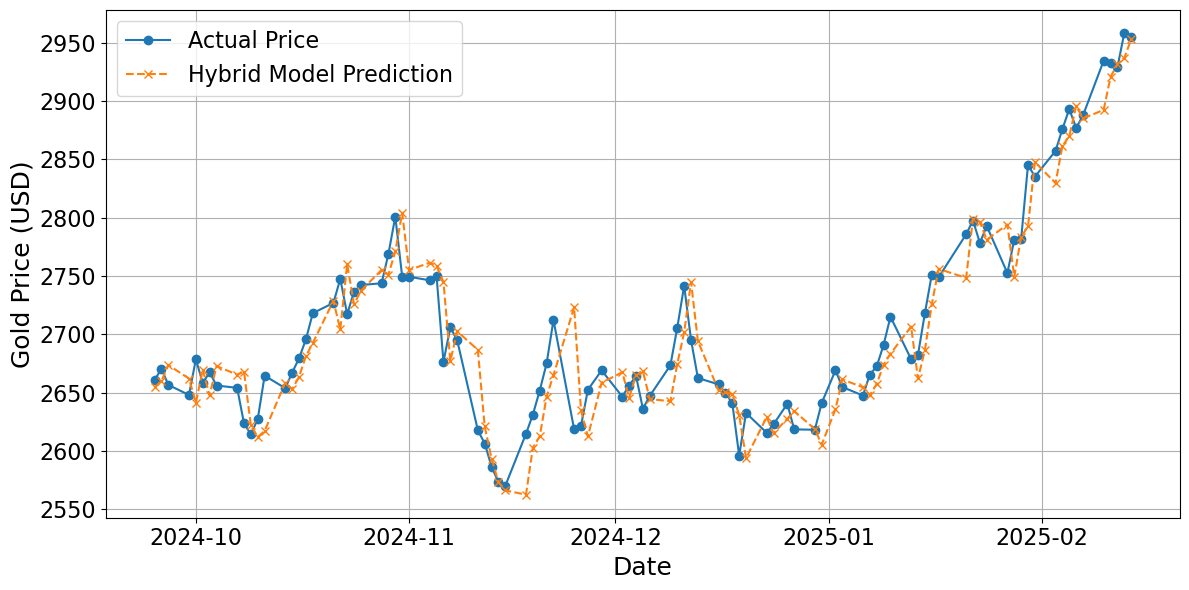

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.statespace.sarimax import SARIMAX

# --- 1. Đọc dữ liệu từ file ---
file_path = "gold_macro_data.xlsx"  # Thay đường dẫn này bằng đường dẫn thực tế của bạn
df = pd.read_excel(file_path, sheet_name="Sheet1")

df.rename(columns={df.columns[0]: "Date", df.columns[1]: "Gold_Price"}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
print(df.head())

# --- 2. SARIMA Model ---
model_sarima = SARIMAX(df['Gold_Price'], 
                        order=(1, 1, 1),  
                        enforce_stationarity=False, 
                        enforce_invertibility=False)

model_sarima_fit = model_sarima.fit()

df['Residuals'] = model_sarima_fit.resid

# --- 3. LSTM Model ---
scaler = MinMaxScaler(feature_range=(-1, 1))
df['Residuals_scaled'] = scaler.fit_transform(df[['Residuals']])

train_size = int(len(df) * 0.8)
train_data, test_data = df['Residuals_scaled'][:train_size], df['Residuals_scaled'][train_size:]

def create_sequences(data, seq_length=10):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

seq_length = 10
X_train, y_train = create_sequences(train_data.values, seq_length)
X_test, y_test = create_sequences(test_data.values, seq_length)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model_lstm = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mse')

model_lstm.fit(X_train, y_train, epochs=250, batch_size=16, validation_data=(X_test, y_test), verbose=1)

y_pred_lstm = model_lstm.predict(X_test)
y_pred_lstm_rescaled = scaler.inverse_transform(y_pred_lstm)

# --- 4. Random Forest Model ---
features = ['USD_Index', 'Fed_Rate', 'US_CPI', 'Oil_Price', 'SP500', 'Bond_Yield']
df_rf = df.dropna()

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(df_rf[features], df_rf['Residuals'], test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

y_pred_rf = rf_model.predict(X_test_rf)

# --- 5. Kết hợp mô hình ---
final_prediction = model_sarima_fit.fittedvalues.iloc[-len(y_pred_lstm):] + y_pred_lstm_rescaled.flatten() + y_pred_rf[-len(y_pred_lstm):]

# --- 6. Đánh giá hiệu suất ---
rmse = np.sqrt(mean_squared_error(df['Gold_Price'].iloc[-len(final_prediction):], final_prediction))
mae = mean_absolute_error(df['Gold_Price'].iloc[-len(final_prediction):], final_prediction)
mape = np.mean(np.abs((df['Gold_Price'].iloc[-len(final_prediction):] - final_prediction) / df['Gold_Price'].iloc[-len(final_prediction):]) * 100)

print(f"Hybrid Model Performance:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")

# --- 7. Biểu đồ so sánh ---
plt.figure(figsize=(12,6))
plt.plot(df.index[-len(final_prediction):], df['Gold_Price'].iloc[-len(final_prediction):], label='Actual Price', marker='o')
plt.plot(df.index[-len(final_prediction):], final_prediction, label='Hybrid Model Prediction', linestyle='dashed', marker='x')

# Tăng cỡ chữ và bỏ tiêu đề
plt.xlabel("Date", fontsize=18)
plt.ylabel("Gold Price (USD)", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)


plt.tight_layout()
plt.show()


            Gold_Price  USD_Index  Fed_Rate  US_CPI  Oil_Price        SP500  \
Date                                                                          
2023-01-03      1846.1     104.52       4.3    2.26      77.12  3831.047727   
2023-01-04      1859.0     104.25       4.3    2.22      73.10  3824.140000   
2023-01-05      1840.6     105.04       4.3    2.22      73.92  3852.970000   
2023-01-06      1869.7     103.88       4.3    2.21      74.04  3808.100000   
2023-01-09      1877.8     103.00       4.3    2.22      74.92  3895.080000   

            Bond_Yield  
Date                    
2023-01-03       3.752  
2023-01-04       3.690  
2023-01-05       3.722  
2023-01-06       3.560  
2023-01-09       3.527  


D:\chính sách\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\chính sách\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\chính sách\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/250
27/27 ━━━━━━━━━━━━━━━━━━━━ 28s 204ms/step - loss: 0.6196 - val_loss: 0.0161
Epoch 2/250
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0290 - val_loss: 0.0036
Epoch 3/250
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0025 - val_loss: 0.0010
Epoch 4/250
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 5.5503e-04 - val_loss: 8.4248e-04
Epoch 5/250
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 4.3205e-04 - val_loss: 8.4034e-04
Epoch 6/250
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 4.6851e-04 - val_loss: 8.5092e-04
Epoch 7/250
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 4.5604e-04 - val_loss: 8.3927e-04
Epoch 8/250
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 3.9295e-04 - val_loss: 8.4327e-04
Epoch 9/250
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 4.5070e-04 - val_loss: 8.4089e-04
Epoch 10/250
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 4.0468e-04 - val_loss: 8.6948e-04
Epoch 11/250
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 4.6017e-04 - val_los

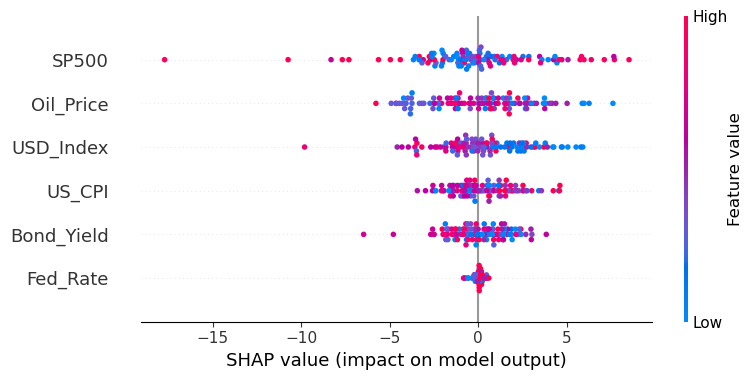

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.statespace.sarimax import SARIMAX

# --- 1. Đọc dữ liệu từ file ---
file_path = "gold_macro_data.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

df.rename(columns={df.columns[0]: "Date", df.columns[1]: "Gold_Price"}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
print(df.head())

# --- 2. SARIMA Model ---
model_sarima = SARIMAX(df['Gold_Price'], 
                        order=(1, 1, 1),  
                        enforce_stationarity=False, 
                        enforce_invertibility=False)

model_sarima_fit = model_sarima.fit()

df['Residuals'] = model_sarima_fit.resid

# --- 3. LSTM Model ---
scaler = MinMaxScaler(feature_range=(-1, 1))
df['Residuals_scaled'] = scaler.fit_transform(df[['Residuals']])

train_size = int(len(df) * 0.8)
train_data, test_data = df['Residuals_scaled'][:train_size], df['Residuals_scaled'][train_size:]

def create_sequences(data, seq_length=10):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

seq_length = 10
X_train, y_train = create_sequences(train_data.values, seq_length)
X_test, y_test = create_sequences(test_data.values, seq_length)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model_lstm = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mse')

model_lstm.fit(X_train, y_train, epochs=250, batch_size=16, validation_data=(X_test, y_test), verbose=1)

y_pred_lstm = model_lstm.predict(X_test)
y_pred_lstm_rescaled = scaler.inverse_transform(y_pred_lstm)

# --- 4. Random Forest Model ---
features = ['USD_Index', 'Fed_Rate', 'US_CPI', 'Oil_Price', 'SP500', 'Bond_Yield']
df_rf = df.dropna()

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(df_rf[features], df_rf['Residuals'], test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

y_pred_rf = rf_model.predict(X_test_rf)

# --- 5. Kết hợp mô hình ---
final_prediction = model_sarima_fit.fittedvalues.iloc[-len(y_pred_lstm):] + y_pred_lstm_rescaled.flatten() + y_pred_rf[-len(y_pred_lstm):]
# --- 6. SHAP Analysis ---
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test_rf)

plt.figure(figsize=(12,6))
shap.summary_plot(shap_values, X_test_rf, feature_names=features)
plt.show()
